# Flights analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
%ls data

data_flights_2016-2017.xls     ~$data_flights_2016-2017.xlsx
data_flights_2016-2017.xlsx


In [55]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target=None, **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    row_order = kwargs.get('row_order', None)
    order = kwargs.get('order', None)
    facet = sns.FacetGrid( df , row = row , col = col, row_order=row_order)
    facet.map( sns.barplot , cat , target, order=order)
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

    

In [7]:
data1617 = pd.read_excel('data/data_flights_2016-2017.xlsx')

In [95]:
data1617['duree h'] = np.abs(data1617['duree h'])
data1617['duree s'] = np.abs(data1617['duree s'])
data1617['vitesse'] = np.abs(data1617['vitesse'])

In [76]:
data1617.head()

saison       date     km  points dep type de vol  vol de groupe  \
NaN NaN  2016-2017 2017-04-10  22.74   22.74  49  Dist 2 pts             -1   
    NaN  2016-2017 2017-05-16  51.12   61.34  74    triangle             -1   
    NaN  2016-2017 2017-08-12  21.42   21.42  73  Dist 2 pts              1   
    NaN  2016-2017 2016-09-25  20.26   20.26  86  Dist 2 pts             -1   
    NaN  2016-2017 2016-09-09  44.56   44.56  12  Dist 2 pts             -1   

                       nom                decollage              atterissage  \
NaN NaN  Stephane MOTRIEUX    Chaudefonds-sur-Layon  notre dame de la touffe   
    NaN    Adrien PRUNIAUX                 Planfait                Talloires   
    NaN  Catherine RAVANAT  Montlambert devant DÈco              Montailleur   
    NaN        David SOUIL           base de Jarzay          Sud des Essarts   
    NaN    Guillaume CARRE     Pouncho d Agast Deco                 ampagnac   

          ...                b3  b4                   ba  \
NaN NaN   ...               NaN NaN             chemillÈ   
    NaN   ...    Angle Parmelan NaN             Planfait   
    NaN   ...             ClÈry NaN          Montailleur   
    NaN   ...               NaN NaN              VouillÈ   
    NaN   ...               NaN NaN  La Bastide Pradines   

                                                  parcours  cat       aile  \
NaN NaN  Chaudefonds-sur-Layon=>notre dame de la touffe...    D   mantra 6   
    NaN  Planfait=>TalloiresPointe de Chauriande-Le Mon...    B  Carrera +   
    NaN  Montlambert devant DÈco=>MontailleurTour du ch...    C    Sigma 9   
    NaN     base de Jarzay=>Sud des EssartsVouillÈ-VouillÈ    O    shaolin   
    NaN  Pouncho d Agast Deco=>ampagnacSaint-Laurent-de...    A    alpha 5   

        Unnamed: 19 vitesse duree h duree s  
NaN NaN         NaN    26.3     0.9    3112  
    NaN         NaN    13.2     3.9   13896  
    NaN         NaN    13.0     1.6    5928  
    NaN         NaN     NaN     0.0       0  
    NaN         NaN    17.7     2.5    9040  

[5 rows x 23 columns]

In [96]:
data1617.describe()

,km,points,vol de groupe,b4,vitesse,duree h,duree s
count,15780.000000,15780.000000,15780.000000,0.0,15485.000000,15780.000000,15780.000000
mean,48.793036,56.561260,-0.872750,NaN,18.219025,2.634924,9486.237262
std,35.574309,42.343082,0.488182,NaN,5.185893,1.659707,5972.663670
min,12.890000,13.480000,-1.000000,NaN,0.800000,0.000000,0.000000
25%,24.387500,28.207500,-1.000000,NaN,14.700000,1.500000,5368.000000
50%,37.520000,42.780000,-1.000000,NaN,17.800000,2.200000,8008.000000
75%,61.000000,69.112500,-1.000000,NaN,21.300000,3.400000,12131.750000
max,448.380000,448.380000,1.000000,NaN,49.600000,22.700000,81814.000000


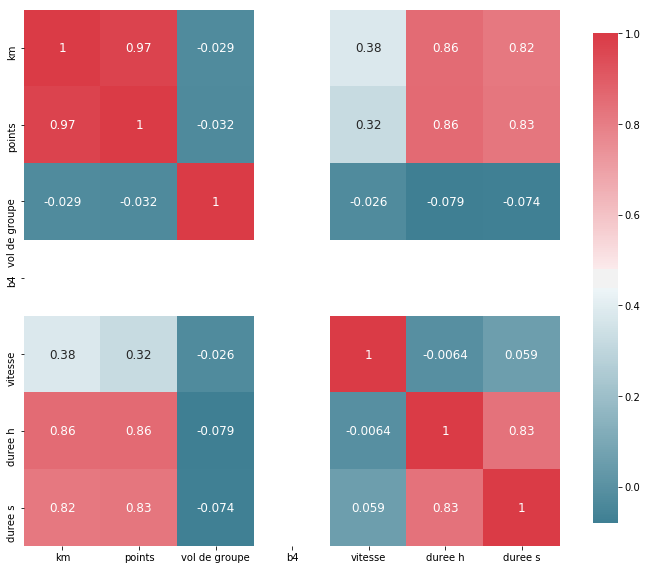

In [78]:
plot_correlation_map(data1617)

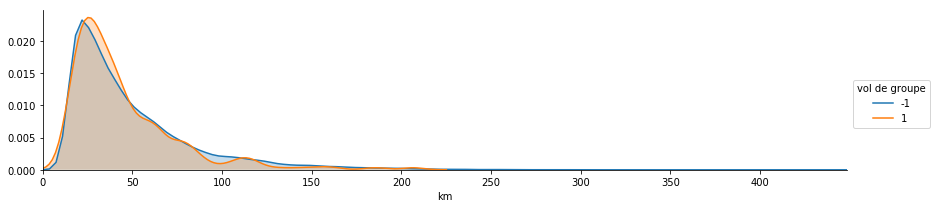

In [29]:
plot_distribution( data1617 , var = 'km', target='vol de groupe')

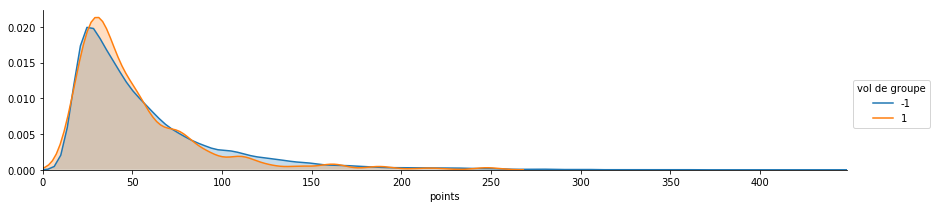

In [28]:
plot_distribution(data1617, var =  'points', target = 'vol de groupe')

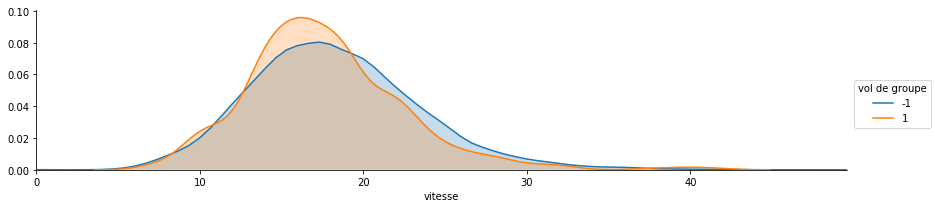

In [30]:
plot_distribution(data1617, var =  'vitesse', target='vol de groupe')

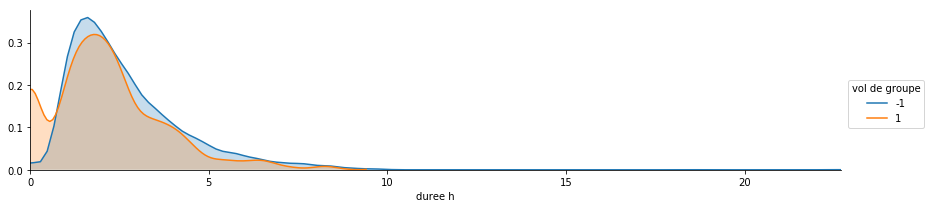

In [79]:
plot_distribution(data1617, var =  'duree h', target='vol de groupe')

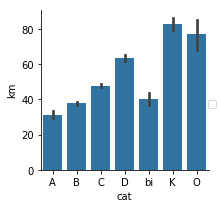

In [56]:
plot_categories(data1617, cat = 'cat', target='km', order=["A", "B", "C", "D", "bi", "K", "O"])

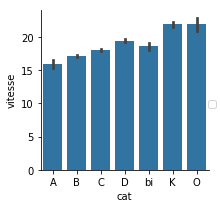

In [57]:
plot_categories(data1617, cat = 'cat', target='vitesse', order=["A", "B", "C", "D", "bi", "K", "O"])

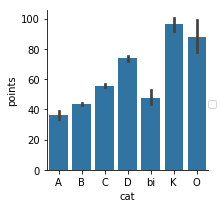

In [58]:
plot_categories(data1617, cat = 'cat', target='points', order=["A", "B", "C", "D", "bi", "K", "O"])

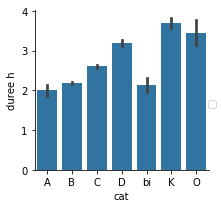

In [59]:
plot_categories(data1617, cat = 'cat', target='duree h', order=["A", "B", "C", "D", "bi", "K", "O"])

In [65]:
plt.close('all')

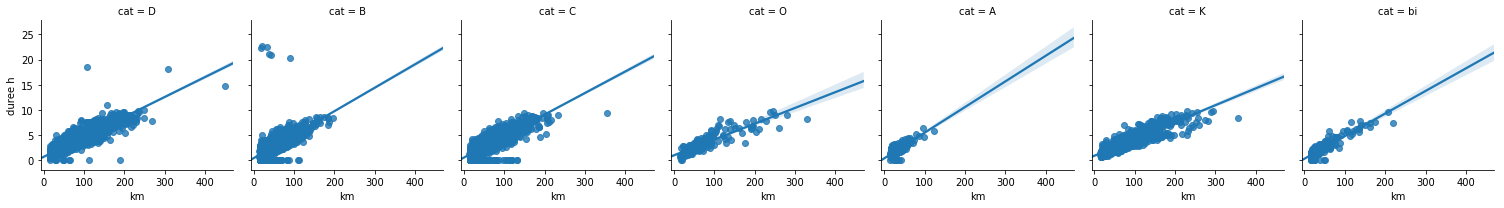

In [81]:
g = sns.FacetGrid(data1617, col="cat") 
g.map(sns.regplot, "km", "duree h") 

/Users/thomasvuillaume/anaconda/envs/paraml/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/thomasvuillaume/anaconda/envs/paraml/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


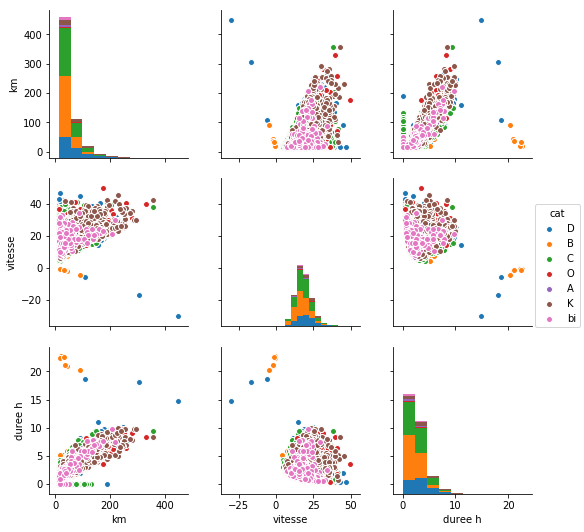

In [84]:
sns.pairplot(data1617[["km", "vitesse", "duree h", "cat"]], hue='cat', size=2.5);


/Users/thomasvuillaume/anaconda/envs/paraml/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/thomasvuillaume/anaconda/envs/paraml/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


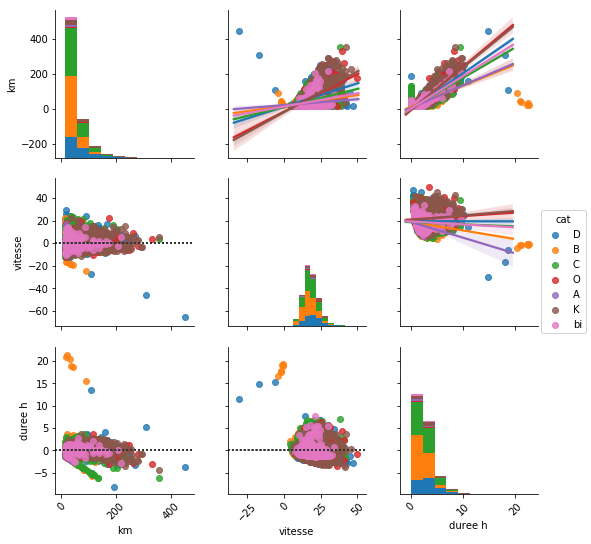

In [83]:
g = sns.PairGrid(data1617[["km", "vitesse", "duree h", "cat"]], hue="cat") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

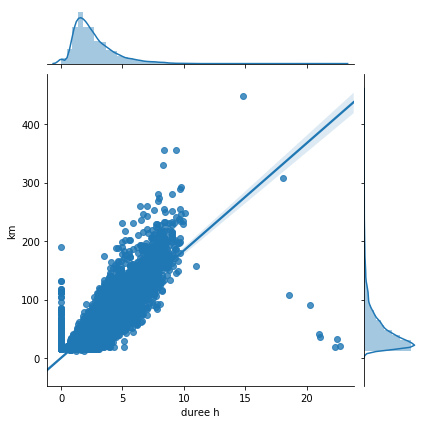

In [97]:
g = sns.JointGrid(x="duree h", y="km", data=data1617) 
g.plot_joint(sns.regplot, order=1) 
g.plot_marginals(sns.distplot)